In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
letters_data = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/2703351c-2827-4948-b781-b8652f509529/letter-recognition.csv")
letters_data.head()

letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8       0       8       0       8  
1      13       3       9       2       8       4      10  
2      10       3       7       3       7       3       9  
3       4       4      10       6      10       2       8  
4       6       5       9       1       7       5      10

In [3]:
letters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
xbox      20000 non-null int64
ybox      20000 non-null int64
width     20000 non-null int64
height    20000 non-null int64
onpix     20000 non-null int64
xbar      20000 non-null int64
ybar      20000 non-null int64
x2bar     20000 non-null int64
y2bar     20000 non-null int64
xybar     20000 non-null int64
x2ybar    20000 non-null int64
xy2bar    20000 non-null int64
xedge     20000 non-null int64
xedgey    20000 non-null int64
yedge     20000 non-null int64
yedgex    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
letters_data.describe()

xbox          ybox         width        height        onpix   \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              xbar          ybar          x2bar        y2bar         xybar   \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

            x2ybar        xy2bar        xedge         xedgey        yedge   \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

            yedgex  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

In [5]:
letters_data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [13]:
letters_data.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar',
       'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge',
       'xedgey', 'yedge', 'yedgex']

In [14]:
x = letters_data.drop(columns=['letter'])
y = letters_data.letter

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


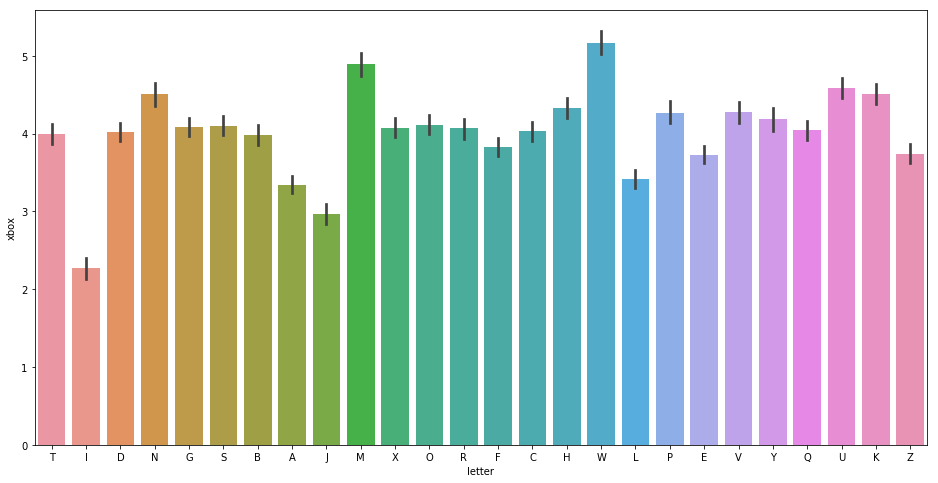

In [15]:
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='xbox', data=letters_data)
plt.show()

In [16]:
letters_data.groupby('letter').mean()

xbox      ybox     width    height     onpix      xbar       ybar  \
letter                                                                          
A       3.337136  6.975919  5.128010  5.178707  2.991128  8.851711   3.631179   
B       3.985640  6.962141  5.088773  5.169713  4.596606  7.671018   7.062663   
C       4.031250  7.063859  4.701087  5.296196  2.775815  5.437500   7.627717   
D       4.023602  7.244720  5.170186  5.288199  4.026087  7.539130   6.806211   
E       3.727865  6.944010  4.756510  5.201823  3.679688  5.966146   7.352865   
F       3.832258  7.009032  4.898065  5.209032  3.178065  4.913548  10.454194   
G       4.086675  6.988357  4.988357  5.282018  3.566624  6.866753   6.586028   
H       4.331063  6.844687  5.784741  5.193460  4.253406  7.344687   7.320163   
I       2.270199  6.980132  2.631788  5.209272  1.825166  7.458278   7.035762   
J       2.970549  6.799197  3.994645  5.614458  2.315930  9.665328   5.666667   
K       4.510149  7.320704  5.945873  5.373478  3.981055  5.592693   7.070365   
L       3.417871  7.128778  4.356110  5.296978  2.649146  4.800263   3.592641   
M       4.895202  6.954545  6.637626  5.275253  5.267677  7.641414   6.407828   
N       4.508301  7.173691  5.803321  5.346105  3.564496  7.012771   7.952746   
O       4.114210  7.124834  4.881806  5.333333  3.503320  7.341301   6.965471   
P       4.268991  7.219178  5.298879  5.524284  3.735990  6.219178   9.955168   
Q       4.043423  6.404853  4.914432  6.408685  4.136654  8.160920   6.808429   
R       4.069921  7.042216  5.226913  5.220317  4.187335  7.147757   8.122691   
S       4.101604  7.441176  5.044118  5.450535  3.486631  7.811497   6.945187   
T       3.996231  7.125628  4.820352  5.193467  2.858040  6.428392  11.369347   
U       4.581796  7.070111  5.387454  5.242312  3.325953  6.116851   6.936039   
V       4.270942  7.324607  5.332461  5.391361  2.815445  6.056283  10.136126   
W       5.168883  7.156915  6.486702  5.343085  4.851064  6.078457   9.214096   
X       4.069886  7.149936  5.651842  5.268107  3.213469  7.252859   7.171537   
Y       4.181934  6.706107  5.250636  5.736641  3.057252  6.436387   9.496183   
Z       3.737057  6.764305  4.878747  5.634877  3.250681  7.525886   7.125341   

           x2bar     y2bar      xybar     x2ybar     xy2bar     xedge  \
letter                                                                  
A       2.755387  2.043093   7.802281   2.338403   8.465146  2.771863   
B       5.366841  5.571802   7.954308   5.506527   6.652742  3.117493   
C       5.927989  7.177989   8.773098   7.494565  11.947011  1.991848   
D       5.921739  6.508075   8.166460   5.111801   5.750311  3.365217   
E       4.223958  7.585938   8.507812   6.242188  10.341146  2.127604   
F       3.476129  4.886452  11.242581   7.830968   5.723871  1.736774   
G       5.966365  5.337646   7.429495   6.157827   9.586028  2.833118   
H       6.702997  4.280654   8.044959   5.899183   7.801090  3.862398   
I       1.940397  5.973510   9.476821   5.797351   7.649007  0.537748   
J       3.921017  5.087015  12.168675   4.663989   8.958501  1.105756   
K       3.822733  5.327470   8.217862   6.205683   9.833559  4.029770   
L       3.450723  6.642576   4.959264   2.545335   8.165572  1.106439   
M       6.041667  3.270202   7.478535   6.813131   8.165404  8.154040   
N       6.629630  3.735632   7.372925   5.906769   7.328225  5.448276   
O       7.140770  4.791501   7.905710   5.868526   8.013280  3.381142   
P       5.363636  3.460772  10.435866   5.909091   4.191781  2.186800   
Q       6.080460  3.908046   6.802043   6.348659   9.229885  3.141762   
R       5.373351  4.622691   7.691293   4.320580   7.613456  3.624011   
S       4.596257  6.295455   8.167112   5.606952   7.576203  1.877005   
T       2.556533  6.515075   8.820352   9.316583   6.707286  1.600503   
U       7.282903  5.937269   7.548585   9.690037   8.528905  3.789668   
V       3.484293  3.024869   7.818063  10.942408   7.650524  3.2

### Model building:

In [18]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#### Scale the feature: 

In [23]:
scaled_x = x
scaled_x[x.columns] = scale(x)
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, train_size=0.7, test_size=0.3, random_state=4)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [25]:
x.head()

xbox      ybox     width    height     onpix      xbar      ybar  \
0 -1.057698  0.291877 -1.053277 -0.164704 -1.144013  0.544130  2.365097   
1  0.510385  1.502358 -1.053277  0.719730 -0.687476  1.531305 -1.075326   
2 -0.012309  1.199738  0.435910  1.161947  1.138672  1.531305 -0.645273   
3  1.555774  1.199738  0.435910  0.277513 -0.230939 -0.936631  0.644886   
4 -1.057698 -1.826464 -1.053277 -1.933571 -1.144013  0.544130 -0.645273   

      x2bar     y2bar     xybar    x2ybar    xy2bar     xedge    xedgey  \
0 -1.714360  0.344994 -0.917071  1.347774  0.034125 -1.305948 -0.219082   
1  0.137561 -0.495072  1.895968 -1.312807  0.514764 -0.448492 -0.219082   
2 -0.973591  0.344994  0.690380 -1.312807 -0.446513 -0.019764 -0.865626   
3 -0.232823  0.344994 -1.720796 -0.932724  0.995402  1.266419  1.074008   
4  0.507945  0.344994 -0.917071 -0.552641  0.514764 -0.877220 -0.865626   

      yedge    yedgex  
0 -1.438153  0.122911  
1  0.120081  1.359441  
2 -0.269477  0.741176  
3 -0.659036  0.122911  
4  0.509640  1.359441

## Model building: 

In [27]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [28]:
metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

0.8528333333333333

In [30]:
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[229,   0,   0,   0,   0,   0,   2,   0,   0,   1,   3,   0,   2,
          0,   1,   0,   1,   3,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 175,   0,   3,   2,   0,   3,   4,   1,   1,   1,   0,   0,
          1,   0,   0,   0,   7,   4,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 191,   0,   6,   1,   6,   2,   0,   0,   7,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   8,   0, 206,   0,   1,   0,   4,   0,   0,   0,   0,   1,
          1,   0,   1,   0,   1,   0,   0,   5,   0,   0,   0,   0,   0],
       [  0,   2,   5,   0, 186,   2,  13,   0,   0,   0,   0,   3,   0,
          0,   0,   0,   2,   2,  10,   2,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   1,   2, 182,   2,   1,   0,   0,   1,   0,   0,
          4,   0,   5,   0,   0,   2,   3,   0,   0,   0,   0,   1,   0],
       [  0,   2,  15,   3,   3,   1, 180,   1,   0,   0,   3,   1,   1,
          0,   1,   1,   9,   4,   4,   0,   

In [32]:
non_linear_model = SVC(kernel='rbf')
non_linear_model.fit(x_train, y_train)
y_pred = non_linear_model.predict(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

0.9431666666666667

In [34]:
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[238,   0,   1,   1,   0,   0,   0,   0,   0,   0,   1,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 193,   0,   4,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   1,   1,   0,   0,   0,   1,   0,   0],
       [  0,   0, 200,   0,   4,   0,   6,   1,   0,   0,   1,   0,   0,
          0,   2,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   3,   0, 216,   0,   0,   0,   7,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   1,   0, 211,   1,   9,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   3,   1,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   1,   0,   0,   1, 197,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   3,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0, 224,   1,   0,   0,   0,   0,   0,
          0,   4,   0,   2,   2,   0,   0,   

### Hyper parameter tuning:

In [38]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)    

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 10.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        2.436438      0.239262         1.469202        0.142081       1   
1        6.334435      0.773756         2.022496        0.253157       1   
2       12.303929      2.622929         2.204514        0.228629       1   
3        1.638852      0.090747         1.093477        0.057381      10   
4        2.744452      0.120379         1.673252        0.085115      10   
5        5.515378      0.209711         1.922916        0.131495      10   
6        1.884985      0.062368         0.878529        0.041344     100   
7        1.998497      0.040860         1.218222        0.088934     100   
8        2.835812      0.282207         1.659782        0.180098     100   
9        2.151826      0.142340         0.782203        0.029617    1000   
10       2.394729      0.080318         0.921203        0.046716    1000   
11       2.264305      0.130521         1.279954        0.048313    1000   

   param_gamma                        params  split0_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}           0.840000   
1        0.001      {'C': 1, 'gamma': 0.001}           0.659286   
2       0.0001     {'C': 1, 'gamma': 0.0001}           0.199643   
3         0.01      {'C': 10, 'gamma': 0.01}           0.908929   
4        0.001     {'C': 10, 'gamma': 0.001}           0.817143   
5       0.0001    {'C': 10, 'gamma': 0.0001}           0.659643   
6         0.01     {'C': 100, 'gamma': 0.01}           0.945714   
7        0.001    {'C': 100, 'gamma': 0.001}           0.870000   
8       0.0001   {'C': 100, 'gamma': 0.0001}           0.810714   
9         0.01    {'C': 1000, 'gamma': 0.01}           0.954643   
10       0.001   {'C': 1000, 'gamma': 0.001}           0.898929   
11      0.0001  {'C': 1000, 'gamma': 0.0001}           0.848929   

    split1_test_score  split2_test_score       ...         mean_test_score  \
0            0.834286           0.825357       ...                0.833929   
1            0.655714           0.671071       ...                0.663857   
2            0.218214           0.189643       ...                0.203071   
3            0.906429           0.908214       ...                0.908857   
4            0.813571           0.803571       ...                0.812429   
5            0.656786           0.670357       ...                0.663786   
6            0.945714           0.945714       ...                0.948286   
7            0.861071           0.856071       ...                0.862786   
8            0.809643           0.797857       ...                0.806214   
9            0.946786           0.947500       ...                0.950286   
10           0.901429           0.900000       ...                0.902000   
11           0.840000           0.842143       ...                0.845429   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.004749                7            0.845268            0.842857   
1         0.006691               10            0.668304            0.677321   
2         0.009372               12            0.216429            0.227589   
3         0.001854                3            0.930179            0.927054   
4         0.004620                8            0.821071            0.821696   
5         0.006661               11            0.667232            0.677143   
6         0.003157                2            0.979375            0.979375   
7         0.004604                5            0.877679            0.877589   
8         0.004863                9            0.816607            0.815804   
9         0.003117                1            0.997768            0.997679   
10        0.002735                4            0.935268            0.927946   
11        0.004604                6            0.860089            0.858750   

    split2_train_score  split3_train_score  split4_train_score  \
0             0.847500            

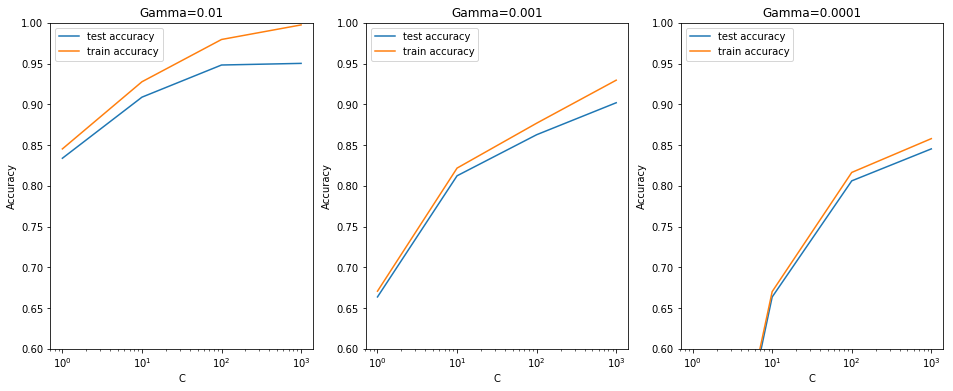

In [40]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [41]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_


In [42]:
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9502857142857143 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}
